### Exemplo I - Cálculo do score da silhueta para avaliação da qualidade de clusterização

In [11]:
#Importação de pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import HTML

In [2]:
#Script para centralizar os gráficos
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
#Carregando o dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Tamanho da base
dataset.shape

(200, 5)

In [5]:
#Checando dados nulos
print(dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
#Extraindo duas colunas para um teste de clusterização
dataset_new = dataset[['Age','Annual Income (k$)',
                       'Spending Score (1-100)']]
dataset_new.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
#Heurística de número máximo de clusters para testar
limit = int((dataset_new.shape[0]//2)**0.5)
limit

10

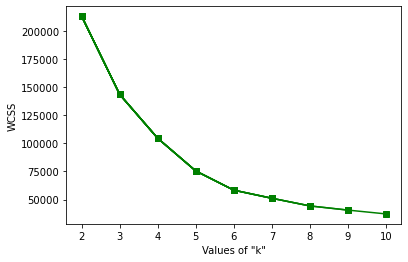

In [8]:
#Valor ótimo de clusters pelo gráfico do cotovelo
wcss = {}
 
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset_new)
    wcss[k] = model.inertia_
    plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

In [9]:
#Gerando score da silhueta para as diferentes combinações de cluster
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset_new)
    pred = model.predict(dataset_new)
    score = silhouette_score(dataset_new, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.293
Silhouette Score for k = 3: 0.384
Silhouette Score for k = 4: 0.392
Silhouette Score for k = 5: 0.444
Silhouette Score for k = 6: 0.452
Silhouette Score for k = 7: 0.441
Silhouette Score for k = 8: 0.426
Silhouette Score for k = 9: 0.397
Silhouette Score for k = 10: 0.381


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

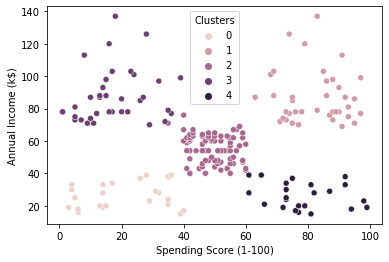

In [15]:
#Geração dos clusters
kmeans = KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(dataset_new)
dataset_new['Clusters'] = kmeans.labels_
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=dataset_new)

### Exemplo II - Clusterização e cálculo do score da silhueta

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [17]:
df = pd.read_csv("nba_2016_2017_100.csv")
df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.5,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,...,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.0,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.470


In [18]:
df[['PLAYER_NAME','PTS','SALARY_MILLIONS']].describe()

,PTS,SALARY_MILLIONS
count,100.000000,100.000000
mean,15.174200,11.290120
std,7.319374,8.789342
min,1.500000,0.310000
25%,9.225000,2.842500
50%,14.550000,10.820000
75%,20.650000,18.400000
max,31.600000,30.960000


Text(0, 0.5, 'Salary (in Millions)')

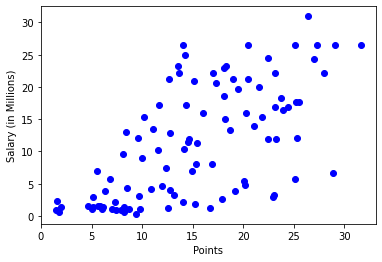

In [20]:
#Scatterplot Points vs Salary
Points=df.iloc[:, [60,59]]['PTS']
Salary=df.iloc[:, [60,59]]['SALARY_MILLIONS']
plt.scatter(Points, Salary, color = 'blue')
plt.xlabel('Points')
plt.ylabel('Salary (in Millions)')

In [21]:
#Decaimento da Soma de Quadrados dos Erros
sse=[] #Sum of Squared Errors
for i in range(1,11):
    kmeans = KMeans(i, init='k-means++', random_state=0)
    kmeans.fit(pd.concat([Points, Salary],axis=1))
    sse.append(kmeans.inertia_)
sse

[12951.75037856,
 4845.283643489188,
 3301.8660454203455,
 2490.9539689220774,
 1895.31785934127,
 1356.040507525988,
 1075.9820204151404,
 983.6770673595848,
 857.0440713049124,
 792.3583459285716]

Text(0, 0.5, 'Error Sum of Squares')

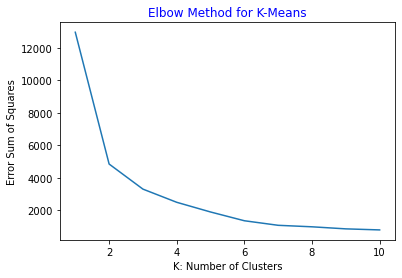

In [22]:
#Gráfico do cotovelo
plt.plot(range(1,11), sse, )
plt.title('Elbow Method for K-Means', color = 'blue')
plt.xlabel('K: Number of Clusters')
plt.ylabel('Error Sum of Squares')

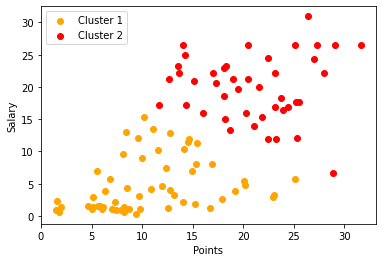

In [23]:
#Avaliação do cenário com 2 clusters
Model = KMeans(2, init='k-means++')
k_means= Model.fit_predict(pd.concat([Points, Salary],axis=1))
X=pd.concat([Points, Salary],axis=1)
plt.scatter(X[k_means == 0]['PTS'], X[k_means == 0]['SALARY_MILLIONS'], c = 'orange', label = 'Cluster 1')
plt.scatter(X[k_means == 1]['PTS'], X[k_means == 1]['SALARY_MILLIONS'], c = 'red', label = 'Cluster 2')
plt.xlabel('Points')
plt.ylabel('Salary')
plt.legend()

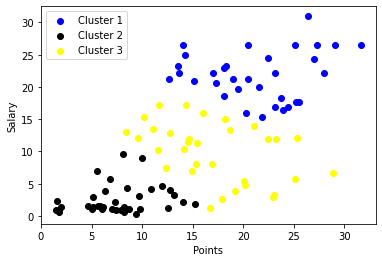

In [24]:
#Avaliação do cenário com 3 clusters
Model = KMeans(3, init='k-means++')
k_means= Model.fit_predict(pd.concat([Points, Salary],axis=1))
X=pd.concat([Points, Salary],axis=1)
plt.scatter(X[k_means == 0]['PTS'], X[k_means == 0]['SALARY_MILLIONS'], c = 'blue', label = 'Cluster 1')
plt.scatter(X[k_means == 1]['PTS'], X[k_means == 1]['SALARY_MILLIONS'], c = 'black', label = 'Cluster 2')
plt.scatter(X[k_means == 2]['PTS'], X[k_means == 2]['SALARY_MILLIONS'], c = 'yellow', label = 'Cluster 3')
plt.xlabel('Points')
plt.ylabel('Salary')
plt.legend()

In [25]:
#Score da silhueta
for num in range(2,6):
    Model = KMeans(num, init='k-means++')
    kmeans = Model.fit_predict(X)
    print("Para "+str(num)+" clusters, o score médiuo da silhueta é igual a ", round(silhouette_score(X, kmeans),2))

Para 2 clusters, o score médiuo da silhueta é igual a  0.52
Para 3 clusters, o score médiuo da silhueta é igual a  0.42
Para 4 clusters, o score médiuo da silhueta é igual a  0.45
Para 5 clusters, o score médiuo da silhueta é igual a  0.43


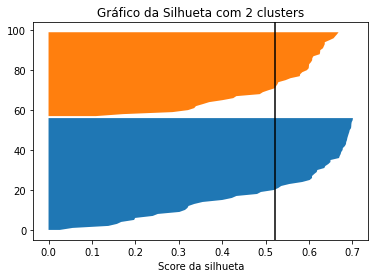

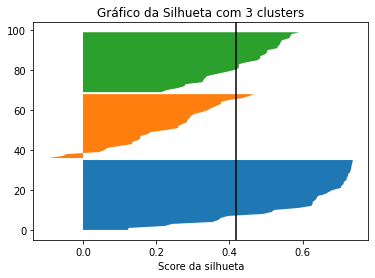

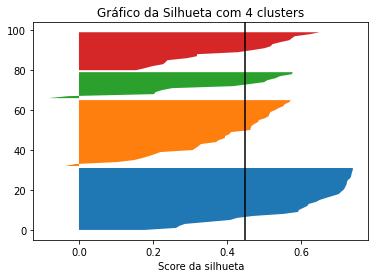

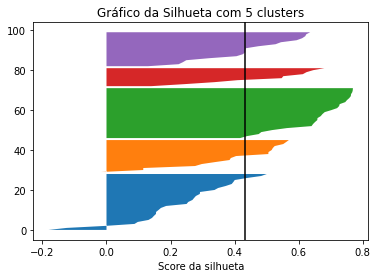

In [26]:
#Gráfico da silhueta
X=pd.concat([Points, Salary],axis=1)
for num in range(2,6):
    Model = KMeans(num, init='k-means++')
    kmeans = Model.fit_predict(X)
    score = silhouette_score(X, kmeans)
    values = silhouette_samples(X, kmeans)
    fig = plt.subplots()
    minimum = 0
    for i in range(num):
        SVI = \
            values[kmeans == i] #Silhouette Value of the current number of clusters
        SVI.sort()
        length = SVI.shape[0]
        maximum = minimum + length
        plt.fill_betweenx(np.arange(minimum, maximum), SVI)
        minimum = maximum
    plt.title("Gráfico da Silhueta com "+str(num)+" clusters")
    plt.xlabel("Score da silhueta")
    plt.axvline(x=score,color="black")
plt.show()
